In [ ]:
### cubic interpolation using Scipy (scientific python library) library

In [7]:
import numpy as np 
import matplotlib.pyplot as plt
import scipy as sp

In [ ]:
# Optimization 

In [8]:
from scipy.optimize import minimize 

### Question 1 
 
Minimze $f(x) = (x-3)^2$ 

In [9]:
def f(x):
    return (x-3)**2
res = minimize(f, 2)  #(function,initial guess) 

In [10]:
res.x


array([2.99999999])

In [ ]:
### Question 2

Minimize $f(x,y) = (x-1)^2+(y-2.5)^2$
Subject to 

$x-2y+2 \ge 0$ <br>
$-x-2y+6 \ge 0$ <br>
$-x+2y+2 \ge 0$ <br>
$x \ge 0$ <br>
$y \ge 0$

- 2D function in vector x
- Constraintss must be specified as $g_i(x) \ge 0$
- Bounds specified as rectangular 

In [11]:
f = lambda x : (x[0] - 1)**2 + (x[1] - 2.5)**2 
# cons must be in tuples of dictionaries form 
cons = ({'type':'ineq','fun':lambda x: x[0] - 2 * x[1] + 2 },
       {'type':'ineq','fun':lambda x: -x[0] - 2 * x[1] + 6 },
       {'type':'ineq','fun':lambda x: -x[0] + 2 * x[1] + 2 })
bnds = ((0,None),(0,None))  
# means x goes from 0 to infinity as y also goes from 0 to infinity

res = minimize(f,(2,0),bounds=bnds,constraints=cons)

In [12]:
res.x

array([1.4, 1.7])

In [ ]:
### So here's why it is returning as an array because if we have function of multiple variables it will return it in an array by defualt

In [13]:
# use 
minimize? # for details

SyntaxError: invalid syntax (2070243660.py, line 2)

In [ ]:
# Interpolation

Suppose you have the following data 

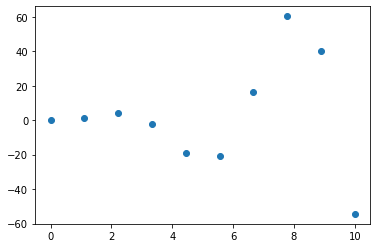

In [14]:
x = np.linspace(0,10,10)
y = x**2 * np.sin(x)
plt.scatter(x,y)

In [15]:
from scipy.interpolate import interp1d

In [16]:
f  = interp1d(x,y,kind = 'cubic')
x_pred = np.linspace(0,10,100)
y_pred = f(x_pred)

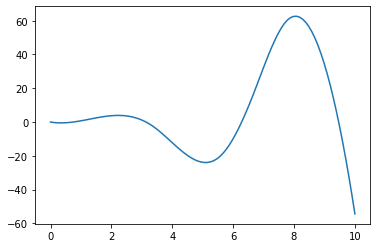

In [17]:
plt.plot(x_pred,y_pred)

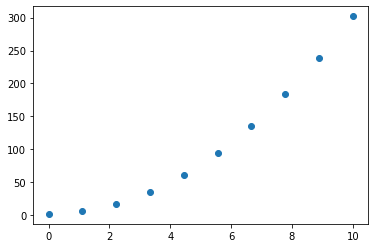

In [18]:
x_data = np.linspace(0,10,10)
y_data = 3 * x_data**2 +2
plt.scatter(x_data,y_data)

In [19]:
from scipy.optimize import curve_fit

def func(x,a,b):
    return a*x**2 + b

popt, pcov = curve_fit(func, x_data, y_data, p0=(1,1))

In [20]:
popt

array([3., 2.])

In [ ]:
# Calculus 

In [ ]:
# Differentiation 

In [21]:
import numpy as np
from scipy.misc import derivative

In [22]:
def f(x):
    return x**2 * np.sin(2*x) * np.exp(-x)
x = np.linspace(0,1,100)

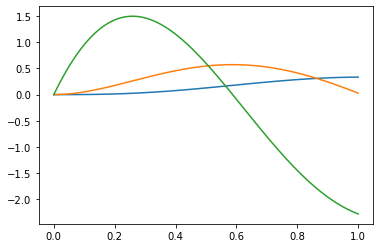

In [23]:
plt.plot(x,f(x))
plt.plot(x, derivative(f , x , dx=1e-6))

# higher order derivative(2nd order) 
plt.plot(x, derivative(f, x, dx=1e-6,n=2)) 

In [ ]:
# Integration

In [ ]:
### Single Integrals 

$\int_{0}^{1}x^2sin(2x)e^{-x}dx$

In [24]:
from scipy.integrate import quad 
integrand = lambda x : x**2 * np.sin(2*x) * np.exp(-x)
integral , integral_error = quad(integrand, 0, 1)

In [25]:
integral

0.14558175869954834

In [ ]:
### Double Integrals 

$\int_{0}^{1}\int_{-x}^{x^2}sin(x+y^2)dydx$

In [26]:
from scipy.integrate import dblquad
import numpy as np

integrand = lambda y, x: np.sin(x+y**2)
lwr_y = lambda x: -x
upr_y = lambda x: x**2
integral , integral_error = dblquad(integrand, 0, 1, lwr_y, upr_y)

In [27]:
integral

0.5900903244088529

In [ ]:
### First order ODEs

Solve the differential equation 

$v' - \alpha v^2 + \beta=0$ , $v(0)=0$ 

In [28]:
from scipy.integrate import odeint

In [29]:
def dvdt(v,t):
    return 3*v**2 - 5

v0 = 0

In [30]:
t = np.linspace(0,1,100)
sol = odeint(dvdt,v0,t)

In [31]:
v_sol = sol.T[0]

Plot

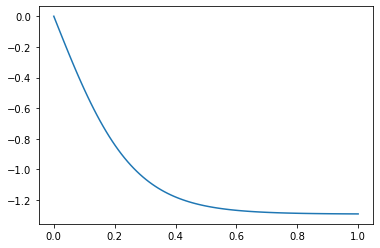

In [32]:
plt.plot(t,v_sol)

In [ ]:
# Linear Algebra Basics

### triangular Matrices 

$\begin{bmatrix}
3 & 0 & 0 & 0\\
2 & 1 & 0 & 0\\
1 & 0 & 1 & 0\\
1 & 1 & 1 & 1\\
\end{bmatrix}x=\begin{bmatrix} 4 \\ 2 \\ 4 \\ 2 \end{bmatrix}$

In [32]:
from scipy.linalg import solve_triangular

a  = np.array([[3,0,0,0],
               [2,1,0,0],
               [1,0,1,0],
               [1,1,1,1]])
b = np.array([4,2,4,2])
x = solve_triangular(a,b,lower=True)
x

array([ 1.33333333, -0.66666667,  2.66666667, -1.33333333])

In [ ]:
### Toeplitz Matrices (matrices with constant diagonals) 

$\begin{bmatrix}
1 & -1 & 2 & 3\\
3 & 1 & -1 & 2\\
6 & 3 & 1 & -1\\
10 & 6 & 3 & 1\\
\end{bmatrix}x=\begin{bmatrix} 1 \\ 2 \\ 2 \\ 5 \end{bmatrix}$

In [33]:
from scipy.linalg import solve_toeplitz, toeplitz

c = np.array([1, 3, 6, 10])    # First column of T
r = np.array([1, -1, -2, -3])  # First row of T
b = np.array([1, 2, 2, 5])

x = solve_toeplitz((c, r), b)
x

array([ 1.66666667, -1.        , -2.66666667,  2.33333333])

In [ ]:
# Newton's divided difference Interpolation 

In [110]:
import pandas as pd
def New_interpolation(x,y,xi):
    n = len(x)   # number of datapoints 
    
# initialize divided difference, f(x) values at different degrees, and error value

    fdd = [[None for x in range(n)] for x in range(n)]
    yint =[None for x in range(n)]
    err = [None for x in range(n)]
    
# Finding divided difference
    
    for i in range(n):
        fdd[i][0] = y[i]
    for j in range(1,n):
        for i in range(n-j):
            fdd[i][j] = (fdd[i+1][j-1] - fdd[i][j-1])/(x[i+j]-x[i])
# Printing fdd here

    fdd_table = pd.DataFrame(fdd)
    print(fdd_table)
    
# interpolating xi
    xterm = 1
    yint[0] = fdd[0][0]
    for order in range(1,n):
        xterm = xterm * (xi - x[order-1])
        yint2 = yint[order-1] + fdd[0][order]*xterm
        err[order-1] = yint2 - yint[order-1]
        yint[order] = yint2
        
# returning a map for pandas dataframe
    return map(lambda y,e : [y,e], yint, err)

In [111]:
x = [1, 4, 6, 5, 3, 1.5, 2.5, 3.5]
y = [0,1.3862944, 1.7917595, 1.6094379, 1.0986123, 0.4054641, 0.9162907, 1.2527630]
a = New_interpolation(x,y,2)
df = pd.DataFrame(a,columns=['f(x)','error'])

          0         1         2         3         4         5         6  \
0  0.000000  0.462098 -0.051873  0.007866 -0.001956  0.000908 -0.000301   
1  1.386294  0.202733 -0.020411  0.003953 -0.001502  0.000456 -0.000110   
2  1.791759  0.182322 -0.024364  0.007709 -0.002186  0.000511       NaN   
3  1.609438  0.255413 -0.059053  0.015361 -0.003464       NaN       NaN   
4  1.098612  0.462099 -0.097456  0.020557       NaN       NaN       NaN   
5  0.405464  0.510827 -0.087177       NaN       NaN       NaN       NaN   
6  0.916291  0.336472       NaN       NaN       NaN       NaN       NaN   
7  1.252763       NaN       NaN       NaN       NaN       NaN       NaN   

          7  
0  0.000076  
1       NaN  
2       NaN  
3       NaN  
4       NaN  
5       NaN  
6       NaN  
7       NaN  


In [112]:
df

,f(x),error
0,0.000000,0.462098
1,0.462098,0.103746
2,0.565844,0.062924
3,0.628769,0.046953
4,0.675722,0.021791
5,0.697513,-0.003616
6,0.693897,-0.000459
7,0.693438,NaN


In [41]:
x = [1, 4, 6, 5, 3, 1.5, 2.5, 3.5]
n = len(x)
lst = []
for x in range(n):
    a  = None
    lst.append(a)

In [42]:
lst

[None, None, None, None, None, None, None, None]

In [44]:
x = [1, 4, 6, 5, 3, 1.5, 2.5, 3.5]
n = len(x)
[None for i in range(n)]

[None, None, None, None, None, None, None, None]

In [60]:
import pandas as pd
import numpy as np

In [62]:
np.arange(0,20)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [63]:
np.arange(0,20).reshape(5,4)

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19]])

In [65]:
data = pd.DataFrame(np.arange(0,20).reshape(5,4),index=['Row1','Row2','Row3','Row4','Row5'],columns=['column1','column2','column3','column4'])

In [66]:
data

,column1,column2,column3,column4
Row1,0,1,2,3
Row2,4,5,6,7
Row3,8,9,10,11
Row4,12,13,14,15
Row5,16,17,18,19


In [ ]:
### We can convert this data into excel sheet 

In [70]:
# csv means data is presented in comma seperated format
data.to_csv('test1.csv')

### Accessing the elements

- .loc  (location) 
- .iloc (index location)

In [72]:
data.loc['Row1']

column1    0
column2    1
column3    2
column4    3
Name: Row1, dtype: int64

In [73]:
type(data.loc['Row1'])

pandas.core.series.Series

In [74]:
# retrieve all rows and columns
data.iloc[:,:]

,column1,column2,column3,column4
Row1,0,1,2,3
Row2,4,5,6,7
Row3,8,9,10,11
Row4,12,13,14,15
Row5,16,17,18,19


In [76]:
# remove column 1 
data.iloc[:,1:]

,column2,column3,column4
Row1,1,2,3
Row2,5,6,7
Row3,9,10,11
Row4,13,14,15
Row5,17,18,19


In [77]:
# if you need 3 rows and 2 columns

data.iloc[0:3,0:2]

,column1,column2
Row1,0,1
Row2,4,5
Row3,8,9


In [81]:
data1 = data.iloc[:,:].values

In [82]:
data1

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19]])

In [83]:
type(data1)

numpy.ndarray

In [84]:
data.isnull().sum()

column1    0
column2    0
column3    0
column4    0
dtype: int64

In [87]:
data['column1'].value_counts()

0     1
4     1
8     1
12    1
16    1
Name: column1, dtype: int64

In [88]:
data1[0][0]

0

In [89]:
data1[1][0]

4

In [97]:
num = len(data1)
for i in range(num):
    print(data1[i][0])

0
4
8
12
16
